In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load train data
train = pd.read_csv("input_data/titanic_train.csv")

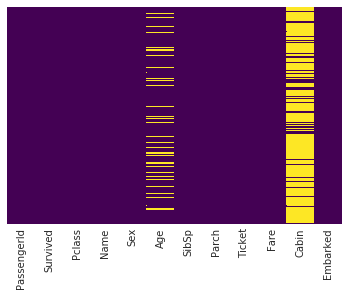

In [10]:
# Checking missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
sns.set_style('whitegrid')

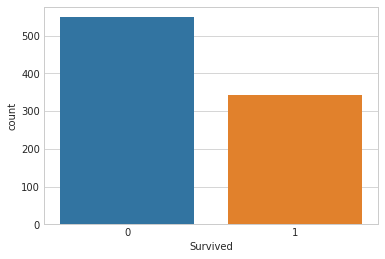

In [11]:
# Checking survived vs non-survived
sns.countplot(x='Survived', data=train)

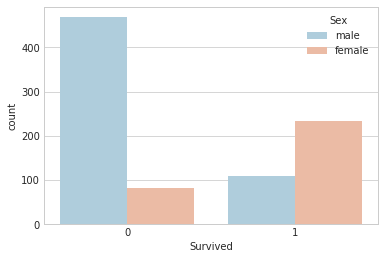

In [14]:
# Checking survived vs non-survived hue = 'Sex
sns.countplot(x='Survived', hue='Sex', data=train, palette= 'RdBu_r')

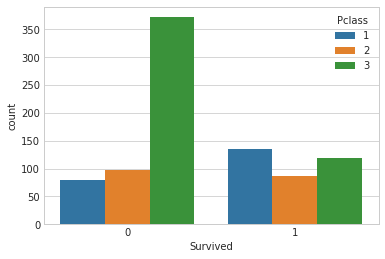

In [16]:
# Checking survived vs non-survived hue = Class 
sns.countplot(x='Survived', hue='Pclass', data=train)

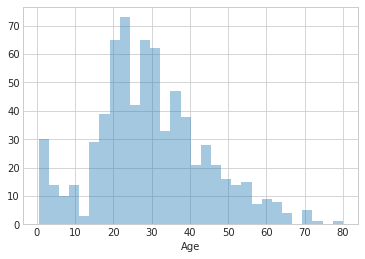

In [17]:
# Checking age
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

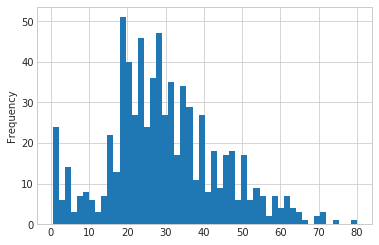

In [21]:
# Checking age
train['Age'].plot.hist(bins=50)

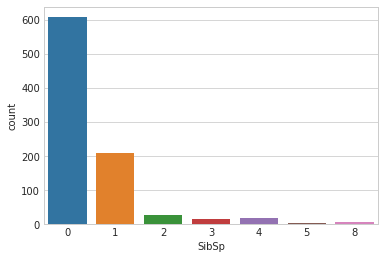

In [23]:
sns.countplot(x="SibSp", data=train)

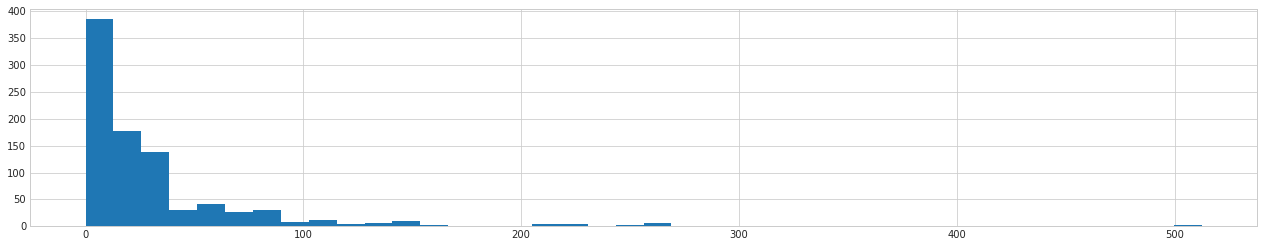

In [31]:
# Distribution on fare price
train['Fare'].hist(bins=40, figsize=(22,4))

In [42]:
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Part 2

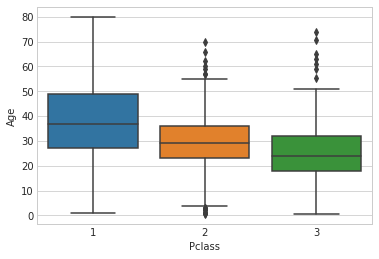

In [49]:
sns.boxplot(x='Pclass', y='Age', data=train,)

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24

    else:
        return Age

In [53]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

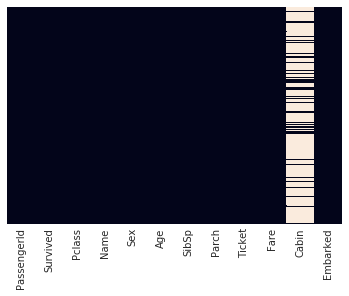

In [56]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [57]:
train.drop('Cabin', axis=1,inplace=True)

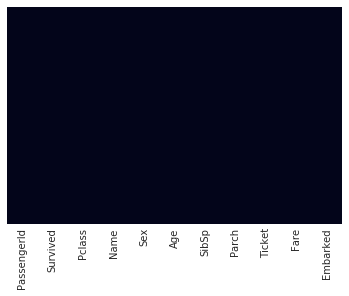

In [60]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [61]:
train.dropna(inplace=True)

In [69]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [70]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [72]:
train = pd.concat([train,sex,embark], axis=1)

In [74]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [76]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [78]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [81]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Part 3

In [83]:
X = train.drop('Survived', axis =1)
y = train['Survived']

In [84]:
from sklearn.cross_validation import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lgmodel = LogisticRegression()

In [89]:
lgmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
predictions = lgmodel.predict(X_test)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]
